<a href="https://colab.research.google.com/github/killicy/AIProgramming/blob/master/BreastCancerPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploration


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import preprocessing

In [ ]:
# Inport data
url = 'https://raw.githubusercontent.com/killicy/MachineLearningData/master/dataR2.csv'
df = pd.read_csv(url, error_bad_lines=False)
print(df)

     Age        BMI  Glucose  ...  Resistin    MCP.1  Classification
0     48  23.500000       70  ...   7.99585  417.114               1
1     83  20.690495       92  ...   4.06405  468.786               1
2     82  23.124670       91  ...   9.27715  554.697               1
3     68  21.367521       77  ...  12.76600  928.220               1
4     86  21.111111       92  ...  10.57635  773.920               1
..   ...        ...      ...  ...       ...      ...             ...
111   45  26.850000       92  ...  10.96000  268.230               2
112   62  26.840000      100  ...   7.32000  330.160               2
113   65  32.050000       97  ...  10.33000  314.050               2
114   72  25.590000       82  ...   3.27000  392.460               2
115   86  27.180000      138  ...   4.35000   90.090               2

[116 rows x 10 columns]


In [ ]:
# Explore features
print(df.columns.values)

['Age' 'BMI' 'Glucose' 'Insulin' 'HOMA' 'Leptin' 'Adiponectin' 'Resistin'
 'MCP.1' 'Classification']


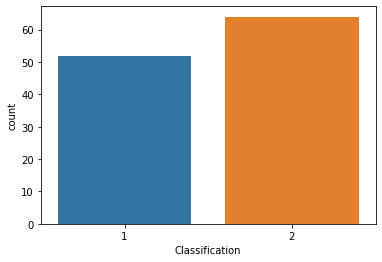

In [ ]:
# Explore distribution
df.Classification.value_counts()
sns.countplot(x='Classification', data=df)

In [ ]:
# Explore Dataset statistics
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [ ]:
# Explore Dataset correlation
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.00,0.01,0.23,0.03,0.13,0.10,-0.22,0.00,0.01,-0.04
BMI,0.01,1.00,0.14,0.15,0.11,0.57,-0.30,0.20,0.22,-0.13
Glucose,0.23,0.14,1.00,0.50,0.70,0.31,-0.12,0.29,0.26,0.38
Insulin,0.03,0.15,0.50,1.00,0.93,0.30,-0.03,0.15,0.17,0.28
HOMA,0.13,0.11,0.70,0.93,1.00,0.33,-0.06,0.23,0.26,0.28
Leptin,0.10,0.57,0.31,0.30,0.33,1.00,-0.10,0.26,0.01,-0.00
Adiponectin,-0.22,-0.30,-0.12,-0.03,-0.06,-0.10,1.00,-0.25,-0.20,-0.02
Resistin,0.00,0.20,0.29,0.15,0.23,0.26,-0.25,1.00,0.37,0.23
MCP.1,0.01,0.22,0.26,0.17,0.26,0.01,-0.20,0.37,1.00,0.09
Classification,-0.04,-0.13,0.38,0.28,0.28,-0.00,-0.02,0.23,0.09,1.00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

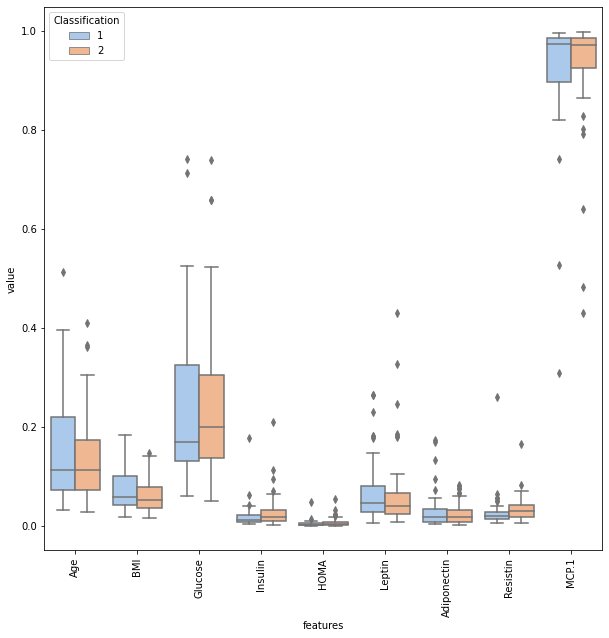

In [ ]:
# Explore noise and outliers
y = df.Classification
x = df.drop('Classification', axis=1)

transformer = preprocessing.Normalizer().fit(x)
x_norm = transformer.transform(x)

x_norm_df = pd.DataFrame(x_norm, columns = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin',
 'MCP.1'])

data = pd.concat([y,x_norm_df.iloc[:,0:9]],axis=1)
data = pd.melt(data,id_vars="Classification",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Classification", data=data, palette="pastel")
plt.xticks(rotation=90)

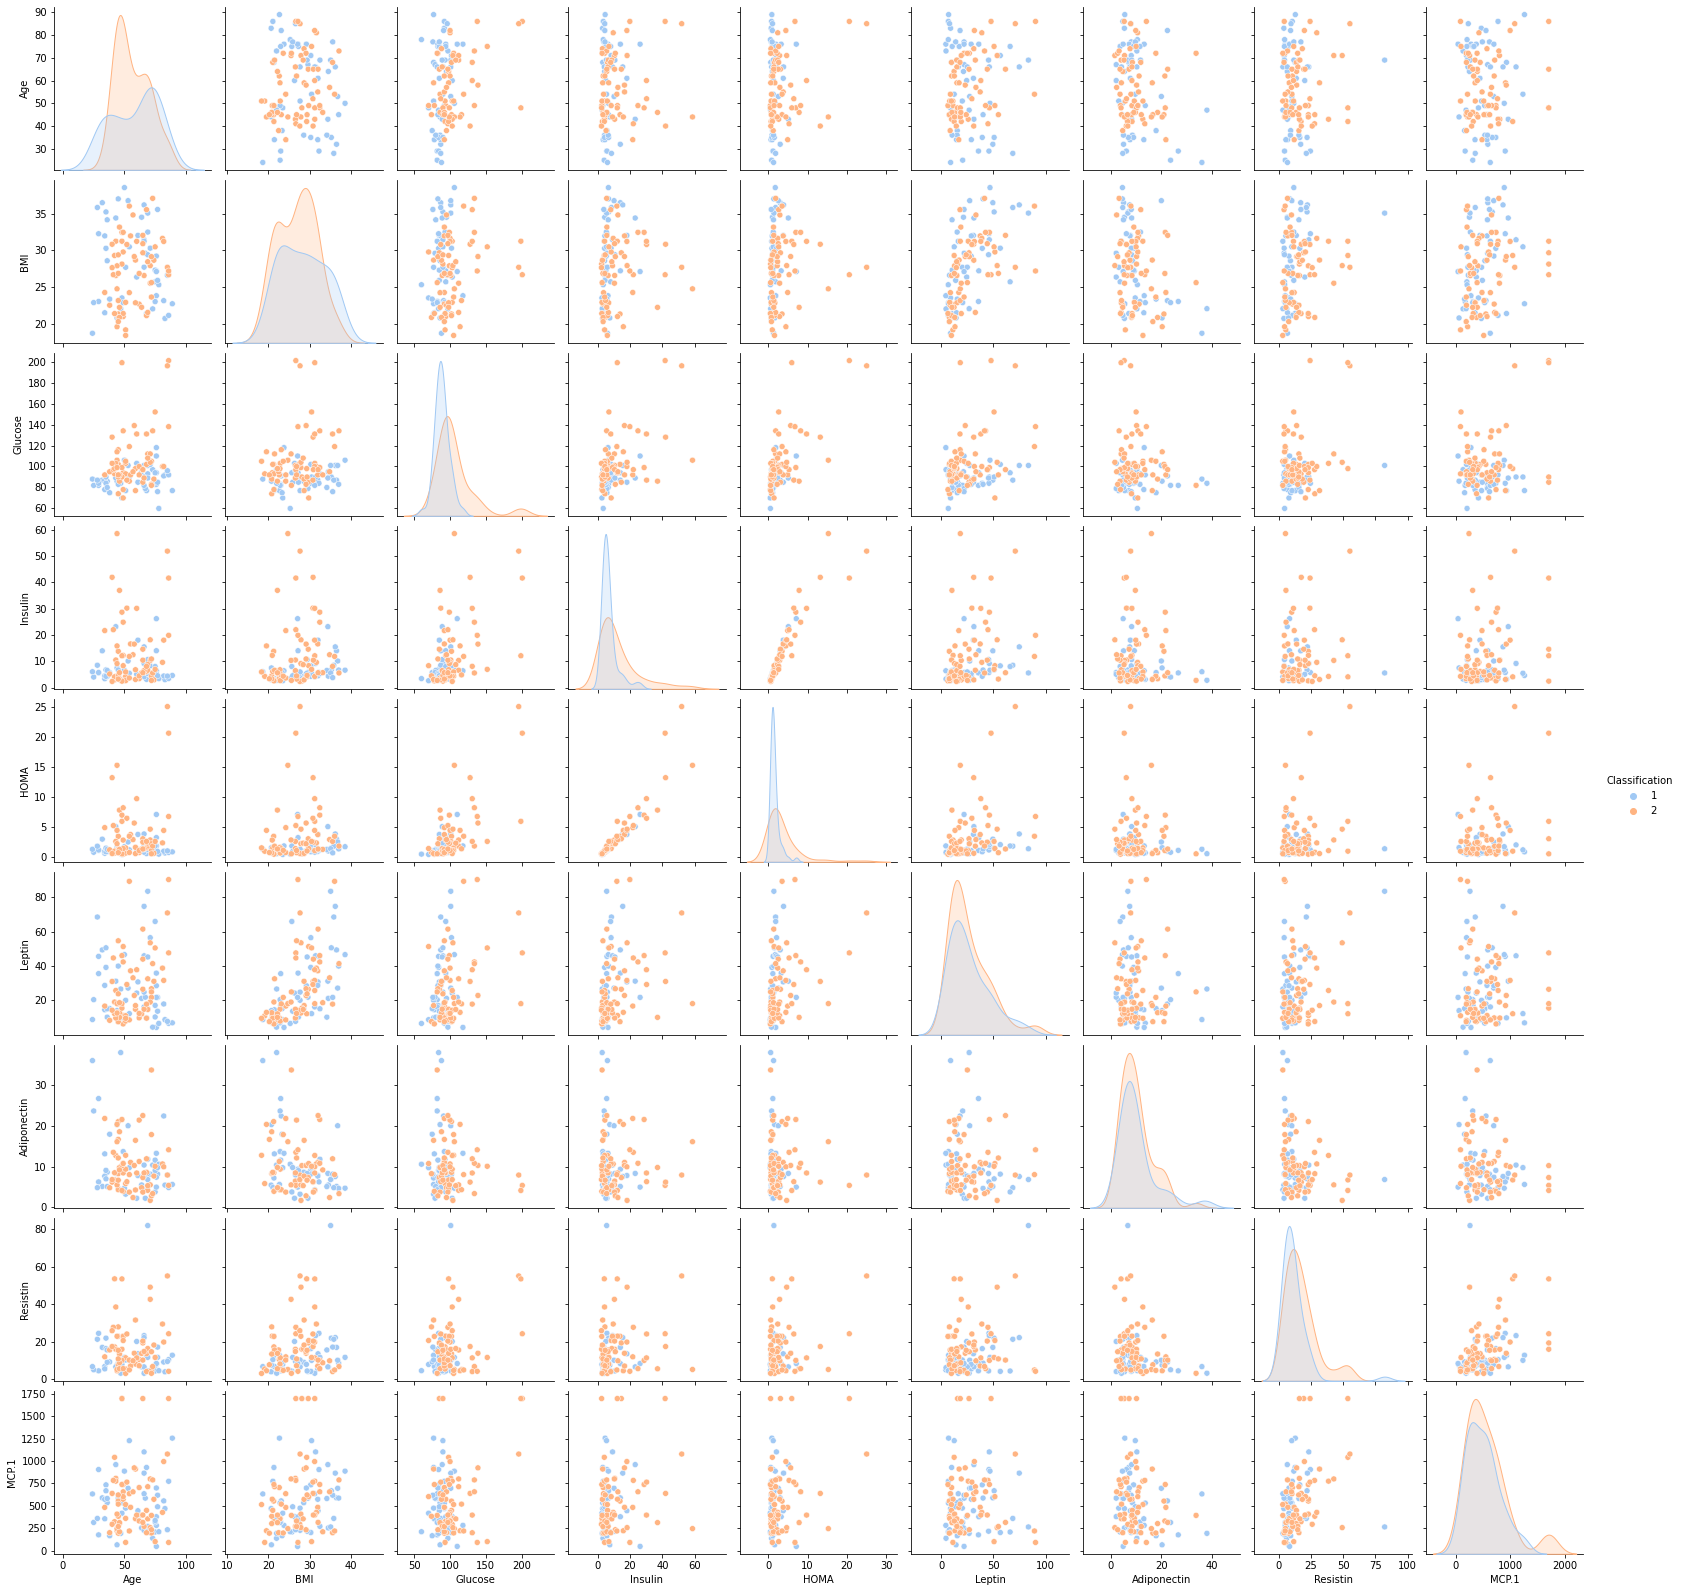

In [ ]:
# Explore graphs comparing classifications
sns.pairplot(df, hue='Classification', palette="pastel")

# Data Preprocessing

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# Import dataset
url = 'https://raw.githubusercontent.com/killicy/MachineLearningData/master/dataR2.csv'
df = pd.read_csv(url, error_bad_lines=False)

### Check for missing values ###
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print("Check for missing values:")
print(missing_data.head(10))
print('\n')

### Categorical conversion
df['Classification'] = pd.Categorical(df['Classification'])

Check for missing values:
                Total    %
Classification      0  0.0
MCP.1               0  0.0
Resistin            0  0.0
Adiponectin         0  0.0
Leptin              0  0.0
HOMA                0  0.0
Insulin             0  0.0
Glucose             0  0.0
BMI                 0  0.0
Age                 0  0.0




## Initial Method Application

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Feature subset selection via Random Forest relevant features
X_train_RF0 = df.drop(['Classification'], axis=1)      # Select features for X
y_train_RF0 = df['Classification']                      # Select classification for y

rf = RandomForestClassifier()  # build initial random forest classifier using GINI
rf.fit(X_train_RF0, y_train_RF0)                                        # fit to data

rf_cv_score = cross_val_score(rf, X_train_RF0,y_train_RF0, cv=5)        #5-fold cross validation
print("Initial Random Forest 5-Fold cross-vadiation score average: %0.3f" % (rf_cv_score.mean()))
print("Random Forest determined relevant features:")
print(X_train_RF0.columns)
print(rf.feature_importances_)

print('\n')
print(rf.base_estimator_)
print('\n')
print(rf.classes_)

Initial Random Forest 5-Fold cross-vadiation score average: 0.707
Random Forest determined relevant features:
Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')
[0.14407081 0.1144917  0.21989501 0.07013784 0.1001059  0.07853469
 0.05972759 0.15358577 0.0594507 ]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


[1 2]


## Feature Subset Selection

In [ ]:
# Feature subset selection based on anaylisis, research, and Random Forest relevant features
X_train = df[['Age', 'BMI', 'Glucose', 'HOMA', 'Resistin']]         # Select features for X
y_train = df['Classification']                      # Select classification for y

## Data Augmentation

In [ ]:
# balance classess
from imblearn.over_sampling import SMOTE

data_aug = SMOTE(sampling_strategy='not majority', random_state=42, k_neighbors=5)
X_train_over, y_train_over = data_aug.fit_resample(X_train, y_train)

X_train_over = pd.DataFrame(X_train_over, columns = ['Age', 'BMI', 'Glucose', 'HOMA', 'Resistin'])
y_train_over = pd.DataFrame(y_train_over, columns = ['Classification'])

print(X_train_over.info())
print(y_train_over.info())

# synthetic replicaiton via GMM clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       128 non-null    float64
 1   BMI       128 non-null    float64
 2   Glucose   128 non-null    float64
 3   HOMA      128 non-null    float64
 4   Resistin  128 non-null    float64
dtypes: float64(5)
memory usage: 5.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Classification  128 non-null    int64
dtypes: int64(1)
memory usage: 1.1 KB
None


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Build Evaluator

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

kfold = 5
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

records = []

# Decision Tree

Initial Results
0.748923076923077 0.7573737373737374 0.7846153846153846 0.755050505050505


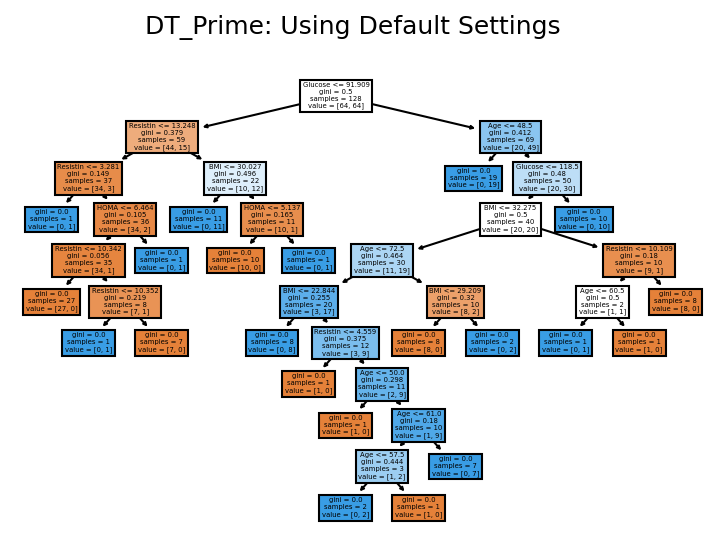



Interim Results
0.7892307692307693 0.7929487179487179 0.8282051282051283 0.7994832753453445


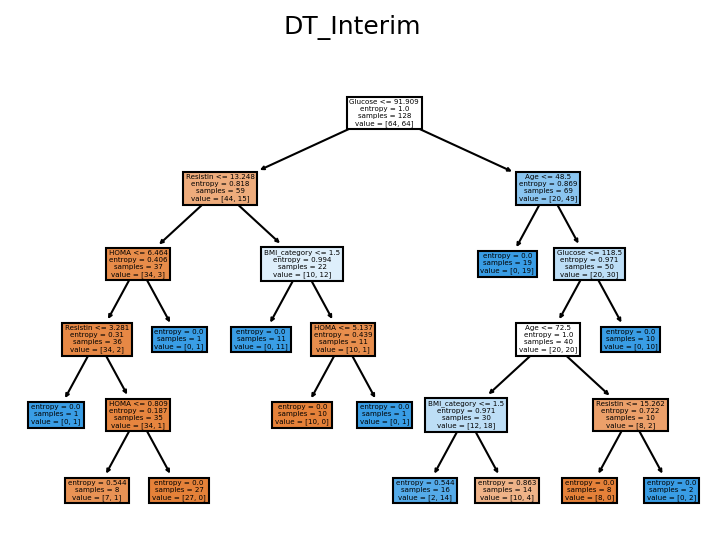



GridSearch determined best parameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fine-Tuned Results
0.8126153846153846 0.8108058608058609 0.8435897435897436 0.8203419657692521


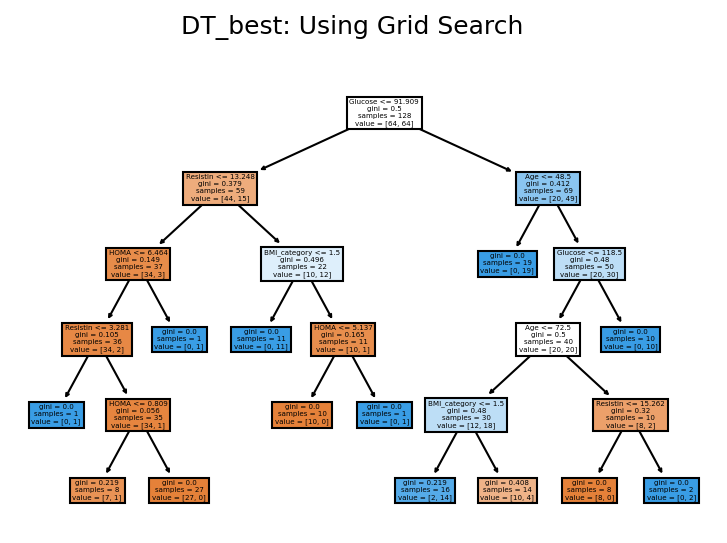

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

X_train_DT = X_train_over.copy()   # Use and copy X_train from feature selection
y_train_DT = y_train_over.copy()   # Use and copy y_train from feature selection

# X_train_DT = X_train
# y_train_DT = y_train

## Initial Method
DT_prime = tree.DecisionTreeClassifier(random_state=42)        # no tuning
DT_prime.fit(X_train_DT, y_train_DT)


results = cross_validate(estimator=DT_prime, X=X_train_DT, y=y_train_DT,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Decision Tree Initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

plt.figure(num="DT_Prime",dpi=150)
plt.suptitle("DT_Prime: Using Default Settings")
tree.plot_tree(DT_prime, feature_names=X_train_DT.columns, filled=True)
plt.show()
print('\n')

## Interim Method
### Discretize BMI into healthy (< 24.9), overweight (25.0-29.9), obese (30.0-39.9), and extremely obese (> 40.0)
# create bands as conditions
X_train_DT1 = X_train_over.copy()   # Use and copy X_train from feature selection
y_train_DT1 = y_train_over.copy()   # Use and copy y_train from feature selection

BMI_band = [(X_train_DT1['BMI'] > -0.001) & (X_train_DT1['BMI'] <= 24.9),
            (X_train_DT1['BMI'] > 25.0) & (X_train_DT1['BMI'] <= 29.9), 
            (X_train_DT1['BMI'] > 30.0) & (X_train_DT1['BMI'] <= 39.9),
            (X_train_DT1['BMI'] > 40.0) & (X_train_DT1['BMI'] <= 100), ]

# create ordinal labels for each condition: 0 = healthy, 1 = overweight, 2 = obese, 3 = extremely obese
BMI_indicator = [0, 1, 2, 3]

# create new column and assign values
X_train_DT1['BMI_category'] = np.select(BMI_band, BMI_indicator)

# convert to ordinal variable
X_train_DT1['BMI_category'] = pd.Categorical(X_train_DT1['BMI_category'], ordered=True)

X_train_DT1 = X_train_DT1.drop('BMI', axis=1)

DT_1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)        
DT_1.fit(X_train_DT1, y_train_DT1)

results = cross_validate(estimator=DT_1, X=X_train_DT1, y=y_train_DT1,cv=kfold, scoring=scoring)
print("Interim Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Decision Tree Interim",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

plt.figure(num="DT_Interim",dpi=150)
plt.suptitle("DT_Interim")
tree.plot_tree(DT_1, feature_names=X_train_DT1.columns, filled=True)
plt.show()
print('\n')

## Final Method

DT_best= tree.DecisionTreeClassifier(random_state=42)
DT_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 3, 5, 8, 10],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [1, 5, 10, 20]
             }

DT_best = GridSearchCV(DT_best, DT_params, cv=5, return_train_score=False, scoring='accuracy')
DT_best.fit(X_train_DT1,y_train_DT1)

results = cross_validate(estimator=DT_best.best_estimator_, X=X_train_DT1, y=y_train_DT1,cv=kfold, scoring=scoring)
print("GridSearch determined best parameters:")
print(DT_best.best_params_)
print("Fine-Tuned Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Decision Tree Final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

plt.figure(num="DT_best",dpi=150)
plt.suptitle("DT_best: Using Grid Search")
tree.plot_tree(DT_best.best_estimator_, feature_names=X_train_DT1.columns, filled=True)
plt.show()


# Bagging

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Data
X_train_bag = X_train_DT1.copy()  # using set with BMI discretized into ordinal value
y_train_bag = np.ravel(y_train_over.copy())

## Initial
# Train
clf = BaggingClassifier(random_state=42)
clf.fit(X_train_bag,y_train_bag)

# Test
results = cross_validate(estimator=clf, X=X_train_bag, y=y_train_bag,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Bagging initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

## Final
# Train
clf = BaggingClassifier(random_state=42)
clf_params = {'n_estimators': [10, 25, 50, 75, 100, 150, 200, 300]}
clf = GridSearchCV(clf, clf_params, cv=5, return_train_score=False, scoring='accuracy')
clf.fit(X_train_bag,y_train_bag)

# Test
results = cross_validate(estimator=clf.best_estimator_, X=X_train_bag, y=y_train_bag,cv=kfold, scoring=scoring)
print(clf.best_params_)
print("Fine-Tuned Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Bagging final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])


Initial Results
0.7341538461538462 0.7725641025641027 0.767948717948718 0.7406999136907972
{'n_estimators': 300}
Fine-Tuned Results
0.796 0.8366666666666667 0.8153846153846154 0.8027899686520377


# ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Data
X_train_ada = X_train_over.copy() 
y_train_ada = np.ravel(y_train_over.copy())

## Initial
# Train
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train_ada,y_train_ada)

# Test
results = cross_validate(estimator=clf, X=X_train_ada, y=y_train_ada,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Adaboost initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

## Final
# Train
clf = AdaBoostClassifier(random_state=42)
clf_params = {'n_estimators': [10, 25, 50, 75, 100, 150, 200, 300]}
clf = GridSearchCV(clf, clf_params, cv=5, return_train_score=False, scoring='accuracy')
clf.fit(X_train_ada,y_train_ada)

# Test
results = cross_validate(estimator=clf.best_estimator_, X=X_train_ada, y=y_train_ada,cv=kfold, scoring=scoring)
print(clf.best_params_)
print("Fine-Tuned Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Adaboost Final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])



Initial Results
0.6790769230769231 0.6589786683904332 0.7974358974358975 0.7161355311355312
{'n_estimators': 10}
Fine-Tuned Results
0.7261538461538461 0.7282467532467533 0.7974358974358975 0.751375478927203


# XGBOOST

In [ ]:
# XGboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Data
X_train_xgb = X_train_over.copy() 
y_train_xgb = np.ravel(y_train_over.copy() )

## Initial
# Train
clf = xgb.XGBClassifier(random_state=42)
clf.fit(X_train_xgb, y_train_xgb)

# Test
results = cross_validate(estimator=clf, X=X_train_xgb, y=y_train_xgb,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["XGboost initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

## Final
# Train
clf = xgb.XGBClassifier(random_state=42)
clf_params = {'n_estimators': [10, 25, 50, 75, 100, 150, 200, 300],'booster': ['gbtree', 'gblinear', 'dart']}
clf = GridSearchCV(clf, clf_params, cv=5, return_train_score=False, scoring='accuracy')
clf.fit(X_train_xgb,y_train_xgb)

# Test
results = cross_validate(estimator=clf.best_estimator_, X=X_train_xgb, y=y_train_xgb,cv=kfold, scoring=scoring)
print(clf.best_params_)
print("Fine-Tuned Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["XGboost final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

Initial Results
0.772 0.8132467532467531 0.7846153846153846 0.7778509735031474
{'booster': 'gbtree', 'n_estimators': 25}
Fine-Tuned Results
0.7963076923076924 0.8589610389610389 0.7846153846153847 0.7956469456469456


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Data
X_train_RF1 = X_train_over.copy() 
y_train_RF1 = np.ravel(y_train_over.copy())

## Initial
# Train
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train_RF1,y_train_RF1)

# Test
results = cross_validate(estimator=RF, X=X_train_RF1, y=y_train_RF1,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Random Forest initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

## Interim
# Train
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)
RF.fit(X_train_DT1,y_train_DT1)  ## using BMI categories

# Test
results = cross_validate(estimator=RF, X=X_train_DT1, y=y_train_DT1,cv=kfold, scoring=scoring)
print("Interim Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Random Forest interim",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

## Final
# Train
RF = RandomForestClassifier(random_state=42)
RF_params = {'criterion': ['gini', 'entropy'],
              'n_estimators': [1,10,50,100,200],
             'max_depth': [None, 3, 5, 8, 10],
             'min_samples_split': [2, 3, 4, 8],
             'min_samples_leaf': [1, 5, 10, 20]
             }
RF = GridSearchCV(RF, RF_params, cv=5, return_train_score=False, scoring='accuracy')
RF.fit(X_train_RF1, y_train_RF1)

# Test
results = cross_validate(estimator=RF.best_estimator_, X=X_train_RF1, y=y_train_RF1,cv=kfold, scoring=scoring)
print(RF.best_params_)
print("Fine-Tuned Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Random Forest Final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])



Initial Results
0.7726153846153847 0.82987012987013 0.7846153846153847 0.7814121608239256


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Interim Results
0.7572307692307693 0.7996613190730837 0.7833333333333333 0.7641666666666668
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 50}
Fine-Tuned Results
0.7966153846153846 0.847095010252905 0.7846153846153847 0.7950743999131097


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

X_svm = X_train_over.copy() 
y_svm = np.ravel(y_train_over.copy())

## Initial
svm_model = SVC(random_state=42)
svm_model.fit(X_svm, y_svm)

results = cross_validate(estimator=svm_model, X=X_svm, y=y_svm,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["SVM initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

#### Scale
min_max_scaler = MinMaxScaler()
X_svm_minmax = min_max_scaler.fit_transform(X_svm)

#### Bin to reduce outlier effect
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')
est.fit(X_svm_minmax)
X_svm_bin = est.transform(X_svm_minmax)
"""
## Interim
svm_model2 = SVC(kernel='rbf', C=100, degree=5, class_weight='balanced',random_state=42)
svm_model2.fit(X_svm_bin,y_svm)
results = cross_validate(estimator=svm_model2, X=X_svm_bin, y=y_svm,cv=kfold, scoring=scoring)

print("Interim Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["SVM Interim",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

"""
## Final
svm_model = SVC(random_state=42)
SVM_params = {'kernel':['linear', 'poly', 'rbf'],
              'degree':[1,2,3,4,5],
              'C': [1.0, 0.1, 0.001, 0.0001, 1e-9, 10, 100, 1000],
              'class_weight': [None, 'balanced']
             }

svm_model = GridSearchCV(svm_model, SVM_params, cv=5, return_train_score=False, scoring='accuracy')
svm_model.fit(X_svm_bin,y_svm)
results = cross_validate(estimator=svm_model.best_estimator_, X=X_svm_bin, y=y_svm,cv=kfold, scoring=scoring)

print("GridSearch determined best parameters:")
print(svm_model.best_params_)
print("Fine-Tuned Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["SVM Final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])




Initial Results
0.6796923076923076 0.6389542483660131 0.8435897435897436 0.7216265884652981
GridSearch determined best parameters:
{'C': 10, 'class_weight': None, 'degree': 1, 'kernel': 'rbf'}
Fine-Tuned Results
0.8187692307692307 0.8335164835164836 0.8615384615384615 0.834018648018648


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_train_KNN = X_train_over.copy()
y_train_KNN = np.ravel(y_train_over.copy())

## Initial
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_KNN, y_train_KNN)

results = cross_validate(estimator=model_knn, X=X_train_KNN, y=y_train_KNN,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["KNN initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

## Final
# Bin to reduce outlier effect
est = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')
est.fit(X_train_KNN)
X_train_KNN = est.transform(X_train_KNN)

model_knn = KNeighborsClassifier()
KNN_params = {'n_neighbors':[1,5,9,15,21,35,41,49],
              'leaf_size': [1,5,15,25,30],
              'weights' : ['uniform', 'distance'],
              'p' : [1,2,3]
             }

model_knn = GridSearchCV(model_knn, KNN_params, cv=5, return_train_score=False, scoring='accuracy')
model_knn.fit(X_train_KNN,y_train_KNN)
results = cross_validate(estimator=model_knn.best_estimator_, X=X_train_KNN, y=y_train_KNN,cv=kfold, scoring=scoring)

print("GridSearch determined best parameters:")
print(model_knn.best_params_)
print("Fine-Tuned Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["KNN Final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

Initial Results
0.7726153846153846 0.8131410256410257 0.75 0.7655702917771883
GridSearch determined best parameters:
{'leaf_size': 1, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Fine-Tuned Results
0.834153846153846 0.8383216783216785 0.9076923076923077 0.8571691445809092


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

X_train_LR = X_train_over.copy()   # Use and copy X_train from feature selection
y_train_LR = np.ravel(y_train_over.copy())  # Use and copy y_train from feature selection

## Maximum Absolute Scaler
# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# store the results in a data frame
X_train_LR_maxabsscaled = pd.DataFrame(abs_scaler.fit_transform(X_train_LR), columns=X_train_LR.columns)

## Min-Max Scaler
# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
X_train_LR_norm = pd.DataFrame(scaler.fit_transform(X_train_LR), columns=X_train_LR.columns)

## Standard Scaler (Z-Score)
# create a scaler object
std_scaler = StandardScaler()

# fit and transform the data
X_train_LR_z = pd.DataFrame(std_scaler.fit_transform(X_train_LR), columns=X_train_LR.columns)

# create a scaler object
scaler = RobustScaler()
# fit and transform the data
X_train_LR_robust = pd.DataFrame(scaler.fit_transform(X_train_LR), columns=X_train_LR.columns)

## Initial

LR_prime = LogisticRegression(random_state=42)
LR_prime.fit(X_train_LR, y_train_LR)

results = cross_validate(estimator=LR_prime, X=X_train_LR, y=y_train_LR,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Logistic Regression Initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

## Final

LR_7 = LogisticRegression(penalty='l2',class_weight='balanced', C=0.85, solver='liblinear', random_state=42, max_iter=1000)
LR_7.fit(X_train_LR_z, y_train_LR)

results = cross_validate(estimator=LR_7, X=X_train_LR_z, y=y_train_LR,cv=kfold, scoring=scoring)
print("Final Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Logistic Regression Final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])


# Gaussian Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Data
X_train_nb = X_train_over.copy() 
y_train_nb = np.ravel(y_train_over.copy())

## Initial
# Train
clf = GaussianNB()
clf.fit(X_train_nb,y_train_nb)

# Test
results = cross_validate(estimator=clf, X=X_train_nb, y=y_train_nb,cv=kfold, scoring=scoring)
print("Initial Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Naive Bayes initial",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])

## Standard Scaler (Z-Score)
# create a scaler object
std_scaler = StandardScaler()

# fit and transform the data
X_train_nb_z = pd.DataFrame(std_scaler.fit_transform(X_train_nb), columns=X_train_nb.columns)

## Final
# Train
clf = GaussianNB()
clf_params = {'var_smoothing': [0, 1e-9, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100],
              'priors': [None, [0.5,0.5], [0.8, 0.2], [0.2,0.8], [0.3, 0.7], [0.7, 0.3]]
              }
clf = GridSearchCV(clf, clf_params, cv=5, return_train_score=False, scoring='accuracy')
clf.fit(X_train_nb,y_train_nb)

# Test
results = cross_validate(estimator=clf.best_estimator_, X=X_train_nb, y=y_train_nb,cv=kfold, scoring=scoring)
print(clf.best_params_)
print("Fine-Tuned Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Naive Bayes final",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])



Initial Results
0.6409230769230769 0.6010453942342486 0.8756410256410257 0.7076497695852535
{'priors': [0.3, 0.7], 'var_smoothing': 0.1}
Fine-Tuned Results
0.6950769230769231 0.7463492063492063 0.6871794871794872 0.6737114343945464


# Custom Ensemble Classifier

In [ ]:
#################################### Component Classifiers ###########################################################
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

SVM = SVC(C= 10, class_weight=None, degree=1, kernel='rbf',random_state=42)
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, random_state=42)
DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
XGB = xgb.XGBClassifier(n_estimators=25, booster='gbtree', random_state=42)
BAG = BaggingClassifier(n_estimators=300,random_state=42)
KNN = KNeighborsClassifier(n_neighbors=15, leaf_size=1, weights='distance', p=1)

#################################### Custom Ensemble Classifier ########################################################
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
VC_X = X_train_over.copy()
VC_y = np.ravel(y_train_over.copy())

## Ensemble Classifier
VC = VotingClassifier(estimators=[
                                  ('SVC', SVM), 
                                  ('RF', RF), 
                                  ('DT', DT), 
                                  ('XGB', XGB),
                                  ('KNN',KNN),
                                  ("BAG",BAG)
                                  ],
                      voting='hard', weights=(0.7, 0.65, 1.5, 0.65, 2.0, 0.65))
VC = VC.fit(VC_X, VC_y)

# print("VC Parameters:", VC.get_params())

results = cross_validate(estimator=VC, X=VC_X, y=VC_y,cv=kfold, scoring=scoring)
print("Custom Ensemble Results")
print(results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean())
records.append(["Custom Ensemble Classifier",results["test_accuracy"].mean(),results["test_precision"].mean(),results["test_recall"].mean(),results["test_f1_score"].mean()])


# Results

In [ ]:
record_df = pd.DataFrame(records, columns = ['Name','Accuracy','Precision','Recall','F1_Score'])
print(record_df)

                           Name  Accuracy  Precision    Recall  F1_Score
0         Decision Tree Initial  0.748923   0.757374  0.784615  0.755051
1         Decision Tree Interim  0.789231   0.792949  0.828205  0.799483
2           Decision Tree Final  0.812615   0.810806  0.843590  0.820342
3               Bagging initial  0.734154   0.772564  0.767949  0.740700
4                 Bagging final  0.796000   0.836667  0.815385  0.802790
5              Adaboost initial  0.679077   0.658979  0.797436  0.716136
6                Adaboost Final  0.726154   0.728247  0.797436  0.751375
7               XGboost initial  0.772000   0.813247  0.784615  0.777851
8                 XGboost final  0.796308   0.858961  0.784615  0.795647
9         Random Forest initial  0.772615   0.829870  0.784615  0.781412
10        Random Forest interim  0.757231   0.799661  0.783333  0.764167
11          Random Forest Final  0.796615   0.847095  0.784615  0.795074
12                  SVM initial  0.679692   0.63895